In [1]:
import tensorflow as tf
from tensorflow import keras

Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


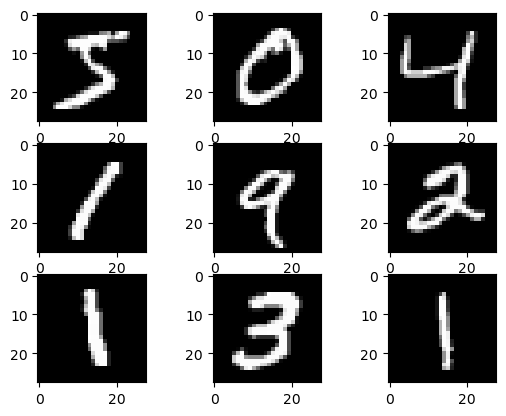

In [52]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, Y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, Y=%s' % (X_test.shape, Y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist

# Splitting into train and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [50]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\visha\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

60000 train samples
10000 test samples


In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [17]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 2s 2ms/step - loss: 1.0679 - accuracy: 0.7526 - val_loss: 0.6517 - val_accuracy: 0.8564
Epoch 2/70
750/750 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.8561 - val_loss: 0.5064 - val_accuracy: 0.8793
Epoch 3/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5108 - accuracy: 0.8715 - val_loss: 0.4496 - val_accuracy: 0.8877
Epoch 4/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4651 - accuracy: 0.8787 - val_loss: 0.4166 - val_accuracy: 0.8932
Epoch 5/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4367 - accuracy: 0.8841 - val_loss: 0.3961 - val_accuracy: 0.8966
Epoch 6/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4170 - accuracy: 0.8879 - val_loss: 0.3809 - val_accuracy: 0.8989
Epoch 7/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4023 - accuracy: 0.8913 - val_loss: 0.3697 - val_accuracy: 0.9004
Epoch 

750/750 [==============================] - 1s 1ms/step - loss: 0.2911 - accuracy: 0.9190 - val_loss: 0.2845 - val_accuracy: 0.9198
Epoch 59/70
750/750 [==============================] - 1s 1ms/step - loss: 0.2906 - accuracy: 0.9192 - val_loss: 0.2842 - val_accuracy: 0.9201
Epoch 60/70
750/750 [==============================] - 1s 1ms/step - loss: 0.2901 - accuracy: 0.9194 - val_loss: 0.2837 - val_accuracy: 0.9205
Epoch 61/70
750/750 [==============================] - 1s 1ms/step - loss: 0.2897 - accuracy: 0.9196 - val_loss: 0.2833 - val_accuracy: 0.9214
Epoch 62/70
750/750 [==============================] - 1s 1ms/step - loss: 0.2892 - accuracy: 0.9197 - val_loss: 0.2831 - val_accuracy: 0.9212
Epoch 63/70
750/750 [==============================] - 1s 1ms/step - loss: 0.2887 - accuracy: 0.9199 - val_loss: 0.2826 - val_accuracy: 0.9216
Epoch 64/70
750/750 [==============================] - 1s 1ms/step - loss: 0.2883 - accuracy: 0.9200 - val_loss: 0.2823 - val_accuracy: 0.9210
Epoch 65/70

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


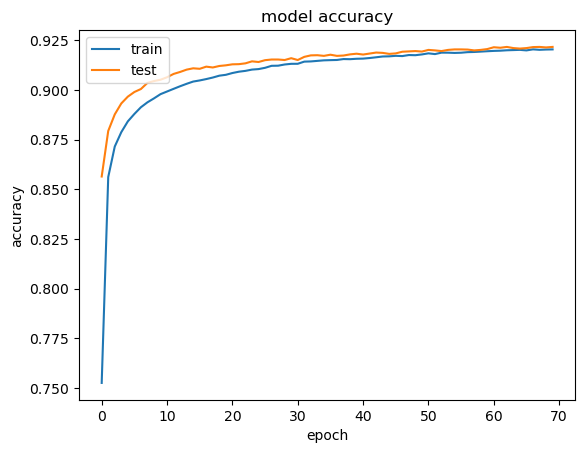

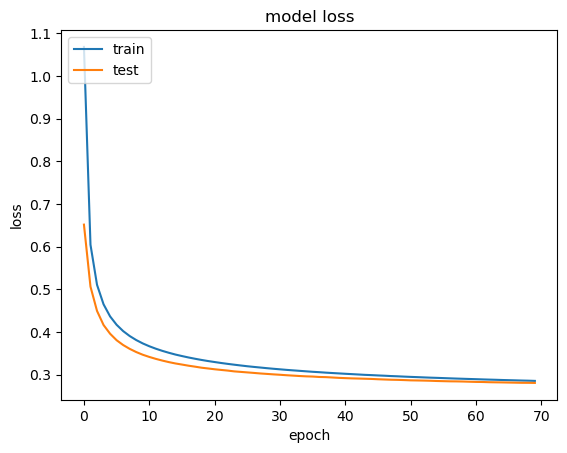

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 976us/step - loss: 0.2826 - accuracy: 0.9222
Test accuracy: 0.9222000241279602


Model_1

In [21]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [22]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 
     

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1207 - accuracy: 0.7043 - val_loss: 0.5090 - val_accuracy: 0.8646
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.8756 - val_loss: 0.3582 - val_accuracy: 0.8996
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.3556 - accuracy: 0.8981 - val_loss: 0.3090 - val_accuracy: 0.9117
Epoch 4/100
750/750 [==============================] - 1s 1ms/step - loss: 0.3131 - accuracy: 0.9097 - val_loss: 0.2825 - val_accuracy: 0.9187
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.2858 - accuracy: 0.9174 - val_loss: 0.2609 - val_accuracy: 0.9241
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.2638 - accuracy: 0.9237 - val_loss: 0.2454 - val_accuracy: 0.9298
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.2460 - accuracy: 0.9285 - val_loss: 0.2323 - val_accuracy: 0.9331

Epoch 58/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0544 - accuracy: 0.9854 - val_loss: 0.1068 - val_accuracy: 0.9699
Epoch 59/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0537 - accuracy: 0.9854 - val_loss: 0.1057 - val_accuracy: 0.9694
Epoch 60/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0527 - accuracy: 0.9856 - val_loss: 0.1077 - val_accuracy: 0.9707
Epoch 61/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0515 - accuracy: 0.9863 - val_loss: 0.1054 - val_accuracy: 0.9703
Epoch 62/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0506 - accuracy: 0.9863 - val_loss: 0.1073 - val_accuracy: 0.9709
Epoch 63/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0495 - accuracy: 0.9871 - val_loss: 0.1043 - val_accuracy: 0.9701
Epoch 64/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0486 - accuracy: 0.9870 - val_loss: 0.1047 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


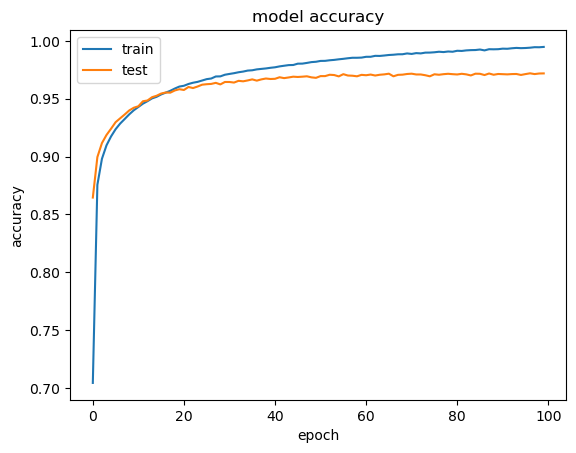

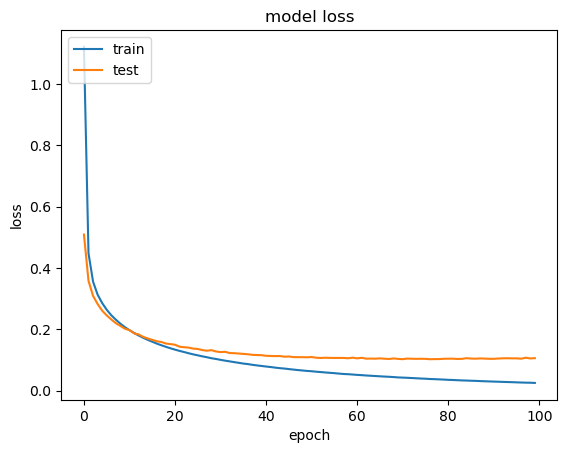

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 979us/step - loss: 0.0927 - accuracy: 0.9732
Test accuracy: 0.9732000231742859


Model_2

In [26]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [27]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     


In [28]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 
     

Epoch 1/50
750/750 [==============================] - 3s 2ms/step - loss: 1.3543 - accuracy: 0.5759 - val_loss: 0.5572 - val_accuracy: 0.8637
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6653 - accuracy: 0.7975 - val_loss: 0.3843 - val_accuracy: 0.8963
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5278 - accuracy: 0.8425 - val_loss: 0.3261 - val_accuracy: 0.9083
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4608 - accuracy: 0.8628 - val_loss: 0.2916 - val_accuracy: 0.9170
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4128 - accuracy: 0.8799 - val_loss: 0.2663 - val_accuracy: 0.9246
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3811 - accuracy: 0.8884 - val_loss: 0.2471 - val_accuracy: 0.9279
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3531 - accuracy: 0.8962 - val_loss: 0.2307 - val_accuracy: 0.9321
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


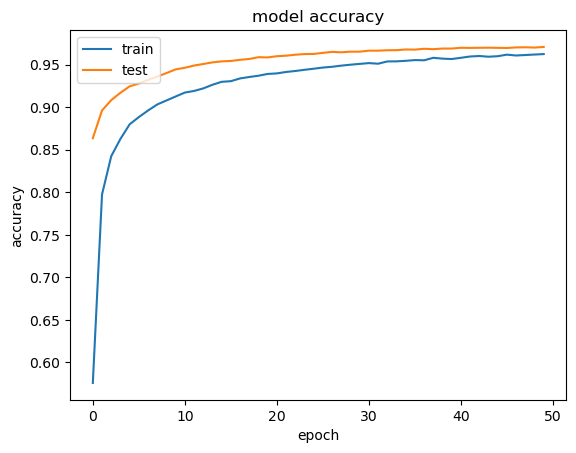

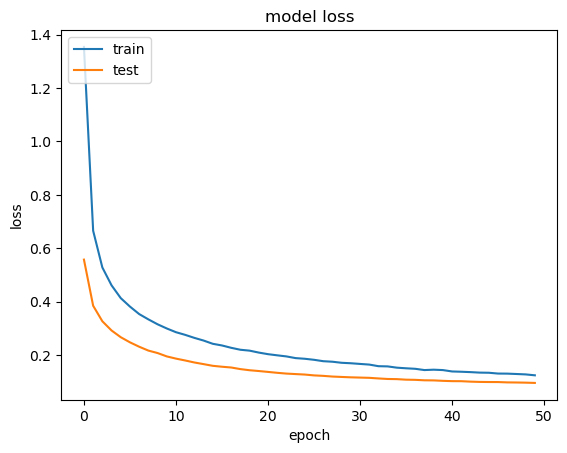

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9722
Test accuracy: 0.9721999764442444


Model_3

In [ ]:


#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [32]:
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

In [33]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2) 


Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.7218 - accuracy: 0.7734 - val_loss: 0.2431 - val_accuracy: 0.9294
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8993 - val_loss: 0.1811 - val_accuracy: 0.9464
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2796 - accuracy: 0.9187 - val_loss: 0.1597 - val_accuracy: 0.9518
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.9250 - val_loss: 0.1425 - val_accuracy: 0.9583
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2211 - accuracy: 0.9353 - val_loss: 0.1345 - val_accuracy: 0.9603
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2055 - accuracy: 0.9388 - val_loss: 0.1259 - val_accuracy: 0.9653
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1965 - accuracy: 0.9432 - val_loss: 0.1192 - val_accuracy: 0.9657
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


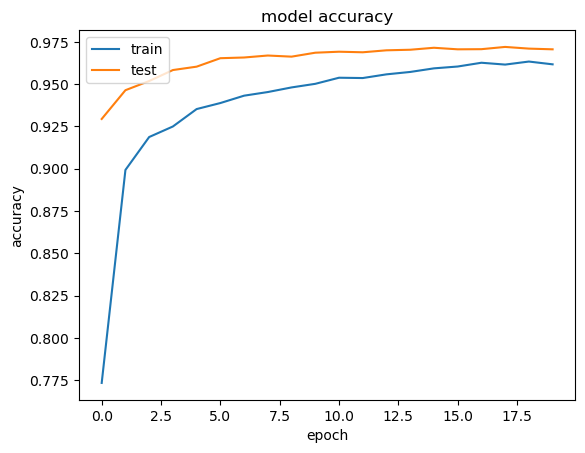

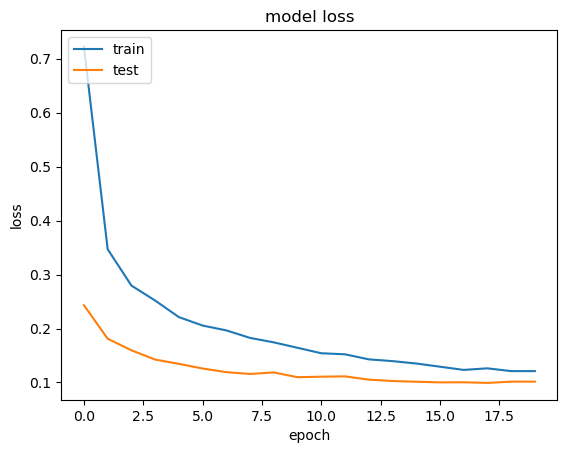

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)
     

313/313 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9705
Test accuracy: 0.9704999923706055


Model_4

In [36]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))
     

In [37]:
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

In [38]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 


Epoch 1/31
375/375 [==============================] - 6s 14ms/step - loss: 0.3014 - accuracy: 0.9087 - val_loss: 0.1303 - val_accuracy: 0.9592
Epoch 2/31
375/375 [==============================] - 5s 14ms/step - loss: 0.1251 - accuracy: 0.9616 - val_loss: 0.1061 - val_accuracy: 0.9663
Epoch 3/31
375/375 [==============================] - 5s 14ms/step - loss: 0.0914 - accuracy: 0.9722 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 4/31
375/375 [==============================] - 5s 13ms/step - loss: 0.0740 - accuracy: 0.9767 - val_loss: 0.0808 - val_accuracy: 0.9763
Epoch 5/31
375/375 [==============================] - 5s 13ms/step - loss: 0.0616 - accuracy: 0.9803 - val_loss: 0.0788 - val_accuracy: 0.9768
Epoch 6/31
375/375 [==============================] - 5s 15ms/step - loss: 0.0524 - accuracy: 0.9828 - val_loss: 0.0786 - val_accuracy: 0.9774
Epoch 7/31
375/375 [==============================] - 5s 14ms/step - loss: 0.0478 - accuracy: 0.9845 - val_loss: 0.0827 - val_accuracy: 0.9768

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


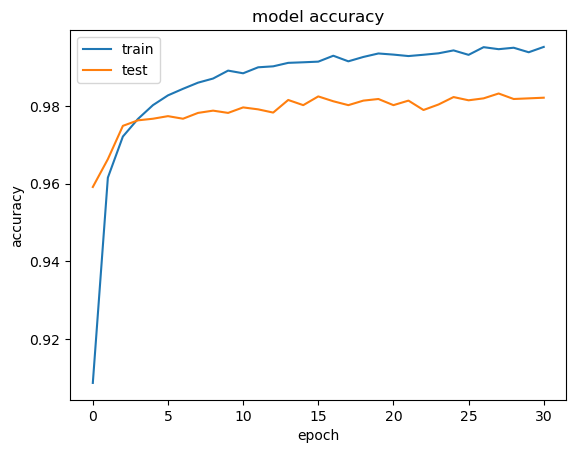

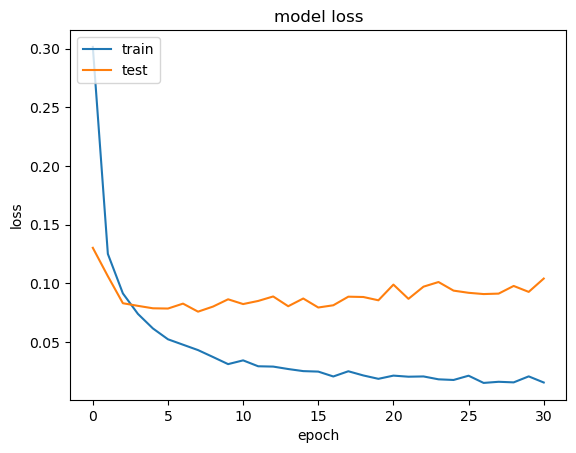

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model_5

In [40]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [41]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

In [42]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 


Epoch 1/30
750/750 [==============================] - 12s 14ms/step - loss: 0.2760 - accuracy: 0.9155 - val_loss: 0.1283 - val_accuracy: 0.9600
Epoch 2/30
750/750 [==============================] - 10s 14ms/step - loss: 0.1208 - accuracy: 0.9622 - val_loss: 0.0985 - val_accuracy: 0.9702
Epoch 3/30
750/750 [==============================] - 10s 14ms/step - loss: 0.0924 - accuracy: 0.9713 - val_loss: 0.0958 - val_accuracy: 0.9710
Epoch 4/30
750/750 [==============================] - 10s 13ms/step - loss: 0.0777 - accuracy: 0.9753 - val_loss: 0.0960 - val_accuracy: 0.9710
Epoch 5/30
750/750 [==============================] - 10s 13ms/step - loss: 0.0666 - accuracy: 0.9784 - val_loss: 0.0850 - val_accuracy: 0.9752
Epoch 6/30
750/750 [==============================] - 9s 11ms/step - loss: 0.0590 - accuracy: 0.9816 - val_loss: 0.0879 - val_accuracy: 0.9767
Epoch 7/30
750/750 [==============================] - 8s 11ms/step - loss: 0.0506 - accuracy: 0.9834 - val_loss: 0.0749 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


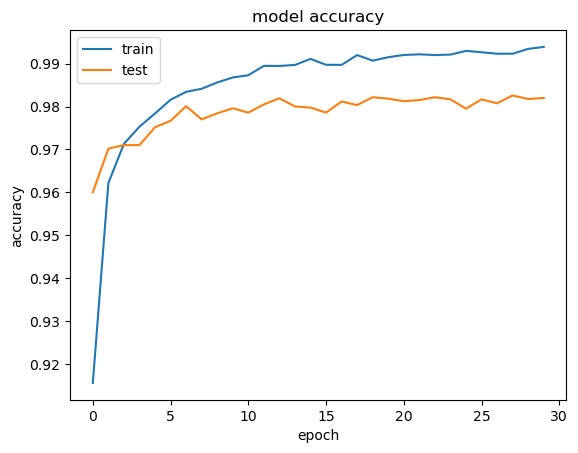

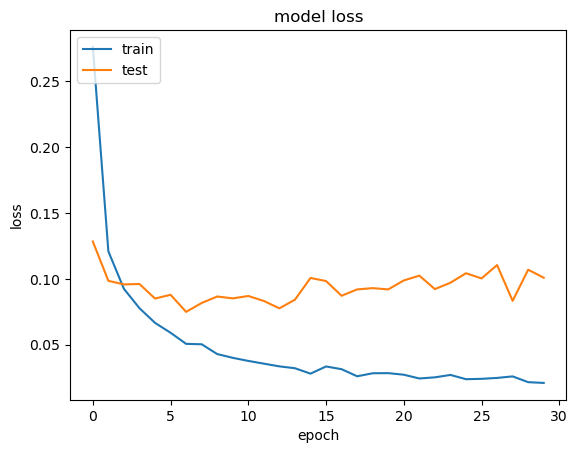

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9837
Test accuracy: 0.9836999773979187


Model_6

In [45]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [46]:
# Compiling the model.
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

In [47]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 
     

Epoch 1/30
750/750 [==============================] - 14s 18ms/step - loss: 0.2959 - accuracy: 0.9084 - val_loss: 0.1256 - val_accuracy: 0.9613
Epoch 2/30
750/750 [==============================] - 13s 18ms/step - loss: 0.1419 - accuracy: 0.9579 - val_loss: 0.1107 - val_accuracy: 0.9656
Epoch 3/30
750/750 [==============================] - 13s 17ms/step - loss: 0.1103 - accuracy: 0.9670 - val_loss: 0.0928 - val_accuracy: 0.9729
Epoch 4/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0937 - accuracy: 0.9713 - val_loss: 0.0870 - val_accuracy: 0.9740
Epoch 5/30
750/750 [==============================] - 12s 16ms/step - loss: 0.0796 - accuracy: 0.9758 - val_loss: 0.0918 - val_accuracy: 0.9753
Epoch 6/30
750/750 [==============================] - 11s 14ms/step - loss: 0.0721 - accuracy: 0.9779 - val_loss: 0.0923 - val_accuracy: 0.9756
Epoch 7/30
750/750 [==============================] - 11s 14ms/step - loss: 0.0679 - accuracy: 0.9797 - val_loss: 0.0799 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


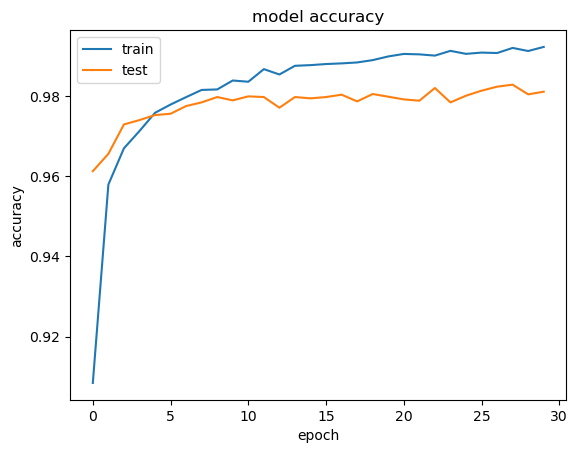

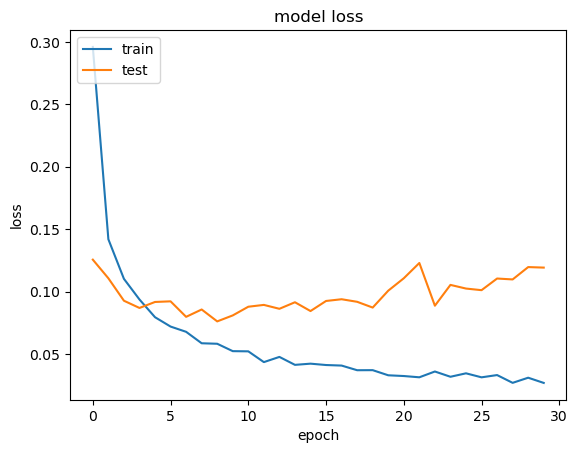

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)
     

313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9842
Test accuracy: 0.9842000007629395
